In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from _utils import u_plot
path = "F:/for learn/Python/Building-Machine-Learning-Projects-with-TensorFlow-master/4/data/"
save_path = "C:/Users/Cigar/Documents/jupyter/Tensorflow_learn/Build ML Projects with TF/Chap03_fig_save/"

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


              age        chd
count  100.000000  100.00000
mean    44.380000    0.43000
std     11.721327    0.49757
min     20.000000    0.00000
25%     34.750000    0.00000
50%     44.000000    0.00000
75%     55.000000    1.00000
max     69.000000    1.00000


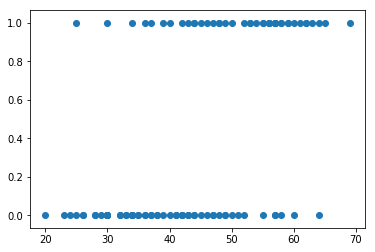

In [2]:
df = pd.read_csv(path + "CHD.csv")
print(df.describe())
plt.scatter(df["age"], df["chd"])
plt.show()

## 单变量TF

In [12]:
# 一些常数
total_size = len(df)
learning_rate = 0.8
batch_size = 20
total_batches = int(total_size / batch_size)
display_step = 1
epochs = 5

In [4]:
ss = StandardScaler()
onc = OneHotEncoder(sparse=False)
data = ss.fit_transform(df["age"].values.reshape(-1, 1)).astype("float32")
label = onc.fit_transform(df["chd"].values.reshape(-1, 1)).astype("float32")
# labels = tf.one_hot(indices=df["chd"].values, 
#                     depth=2, 
#                     on_value=1, 
#                     off_value=0, 
#                     axis=-1, 
#                     name="a").eval(session=sess)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
tf.reset_default_graph()

In [6]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="X")
y = tf.placeholder(dtype=tf.float32, shape=[None, 2], name="y") # 输出各类的概率
with tf.name_scope("Model"):
    def model(X, W, b):
        Z = X @ W + b
        return tf.nn.softmax(Z)
    W = tf.Variable(tf.zeros(dtype=tf.float32, shape=[1, 2]))
    b = tf.Variable(tf.zeros(dtype=tf.float32, shape=[1, 2]))
    y_ = model(X, W, b)

with tf.name_scope("CostFunction"):
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_), axis=1), axis=0)

    
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

writer = tf.summary.FileWriter("F:/board/Chap04/", sess.graph)

cost_op = tf.summary.scalar("cost", cost)
merged = tf.summary.merge_all()

def sigmoid(x, w, b):
    return 1 / (np.exp(x * w + b) + 1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


epoch: 0, W: -0.5075, b: 0.0546, cost: 0.6139
epoch: 1, W: -0.5897, b: 0.2046, cost: 0.5487
epoch: 2, W: -0.6229, b: 0.2758, cost: 0.5426
epoch: 3, W: -0.6773, b: 0.2016, cost: 0.5448
epoch: 4, W: -0.6416, b: 0.2455, cost: 0.5535


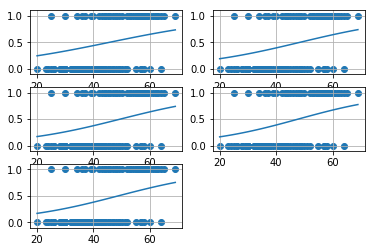

In [13]:
sess.run(init)
trX = np.arange(20, 70)
trX_ = ss.transform(trX.reshape(-1, 1))
graph_number = u_plot.get_graph_number(epochs, 2)

for epoch in range(epochs):
    avg_cost = 0.0
    offset = 0
    data, label = shuffle(data, label)
    for i in range(total_batches):
        old_offset = offset
        offset += batch_size
        batch_xs = data[old_offset : offset, :]
        batch_ys = label[old_offset : offset, :]
        _, summary, c = sess.run([train_op, merged, cost], feed_dict={X: batch_xs, y: batch_ys})
        avg_cost += c
    avg_cost /= total_batches
    writer.add_summary(summary, epoch)
    
    # eval params and plot for each epoch
    if epoch % display_step == 0:
        W_ = W.eval(session=sess)[0][0]
        b_ = b.eval(session=sess)[0][0]
        trY = sigmoid(trX_, W_, b_)
        print("epoch: %d, W: %.4f, b: %.4f, cost: %.4f" % (epoch, W_, b_, avg_cost))       
        
        graph_number += 1
        plt.subplot(graph_number)
        plt.scatter(df["age"], df["chd"])
        plt.plot(trX, trY)
        plt.grid(True)
writer.close()
plt.savefig(save_path + "test.png")
sess.close()

## 使用Skflow进行LR

In [8]:
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from sklearn.preprocessing import StandardScaler

In [ ]:
skflow.Estimator.fit()

In [9]:
def my_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [13]:
ss = StandardScaler()
X1 = ss.fit_transform(df["age"].values.astype(float).reshape(-1, 1))
y1 = df["chd"].values

In [15]:
clf = skflow.Estimator(model_fn=my_model)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E565ADAE48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Cigar\\AppData\\Local\\Temp\\tmpfzyw2p2l'}


In [17]:
clf.fit(X1, y1, batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


ValueError: Shape of a new variable (logistic_regression/weights) must be fully defined, but instead was (1, ?).